In [1]:
#Linear Reg, KNN, RF Model
#Cross Validation & MAE
#Grid Search CV for hyperparameter tuning RF Model

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
df = pd.read_csv("Scaled Cleaned Airbnb Data.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,-1.507086,-1.762305,-0.909332,-1.896695,-1.521590,-0.298959,-0.343030,0.070068,-0.478757,-0.281507,1.464175
1,1,-1.507063,-1.762289,-0.909328,-1.898370,-1.529925,-0.167746,0.847045,-0.449823,-0.722354,-0.198516,0.728599
2,2,-1.507040,-1.762280,-0.909326,-1.972065,-1.535455,-0.298959,-0.215522,2.117138,0.096401,-0.253843,0.594215
3,3,-1.507017,-1.762280,-0.909326,-1.955633,-1.538012,0.219167,-0.173019,-0.287357,-0.620855,-0.253843,0.912493
4,4,-1.506994,-1.762280,-0.909325,-1.669000,-1.646581,-0.275408,-0.300527,1.710973,-0.086297,-0.309170,-0.296964


In [5]:
X_train, X_test, y_train, y_test= train_test_split(df.drop(columns='price'), df.price, test_size=0.3, random_state=47)

In [6]:
X_train.shape, X_test.shape

((59600, 11), (25544, 11))

In [7]:
y_train.shape, y_test.shape

((59600,), (25544,))

In [8]:
X_train.dtypes

Unnamed: 0                          int64
Unnamed: 0.1                      float64
id                                float64
host_id                           float64
latitude                          float64
longitude                         float64
minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

# First Model: Linear Regression

In [9]:
clm = LinearRegression()

In [10]:
clm.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = clm.predict(X_train)
y_test_pred = clm.predict(X_test)

# Model Assessment

In [12]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.022405559641114015, 0.02546461956046464)

In [13]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(0.37141733805648214, 0.3698981018126119)

In [14]:
cv_results = cross_val_score(clm, X_train, y_train, cv = 5)
cv_results

array([0.02497732, 0.02562849, 0.01247126, 0.03636601, 0.02639246])

In [15]:
np.mean(cv_results), np.std(cv_results)

(0.0251671088879754, 0.007594083752756104)

In [16]:
np.round((np.mean(cv_results) - 2 * np.std(cv_results), np.mean(cv_results) + 2 * np.std(cv_results)), 2)

array([0.01, 0.04])

# Hyperparameter tuning with GridSearchCV 

In [86]:
pipe = make_pipeline(SelectKBest(f_regression), LinearRegression())

In [87]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x0000027D5C8908B0>)),
                ('linearregression', LinearRegression())])

In [88]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [89]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.02073590129987113, 0.023760178314726543)

In [90]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.37226422917093316, 0.3707151232866031)

In [91]:
cv_results2 = cross_val_score(pipe, X_train, y_train, cv=5)
print(cv_results2)

[0.02416501 0.02358267 0.01152446 0.03185088 0.02444227]


In [92]:
np.mean(cv_results2), np.std(cv_results2)

(0.023113056987165547, 0.006538180157397594)

In [93]:
np.round((np.mean(cv_results2) - 2 * np.std(cv_results2), np.mean(cv_results2) + 2 * np.std(cv_results2)), 2)

array([0.01, 0.04])

In [95]:
k  =[k+1 for k in range(len(X_train.columns))]
params = {'selectkbest__k': k}

In [96]:
lr_grid_cv = GridSearchCV(pipe, param_grid = params, cv=5, n_jobs=-1)

In [97]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x0000027D5C8908B0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

In [99]:
lr_grid_cv.best_params_

{'selectkbest__k': 11}

In [100]:
pipe_best = make_pipeline(SelectKBest(f_regression, k=11), LinearRegression())

In [101]:
pipe_best.fit(X_train, y_train)
y_pr_lr = pipe_best.predict(X_test)

In [102]:
r2_score(y_test, y_pr_lr)

0.02546461956046464

In [103]:
mean_absolute_error(y_test, y_pr_lr)

0.3698981018126119

In [104]:
cv_best = cross_val_score(pipe_best, X_train, y_train, cv=5)
print(cv_best)

[0.02497732 0.02562849 0.01247126 0.03636601 0.02639246]


In [105]:
np.mean(cv_best), np.std(cv_best)

(0.0251671088879754, 0.007594083752756104)

In [106]:
np.round((np.mean(cv_best) - 2 * np.std(cv_best), np.mean(cv_best) + 2 * np.std(cv_best)), 2)

array([0.01, 0.04])

# Most Useful Features

In [107]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [108]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

availability_365                  0.061034
calculated_host_listings_count    0.020012
Unnamed: 0                        0.000031
host_id                          -0.011149
minimum_nights                   -0.017702
reviews_per_month                -0.026784
latitude                         -0.065729
number_of_reviews                -0.069309
id                               -0.132045
longitude                        -0.232475
Unnamed: 0.1                     -0.582340
dtype: float64

It appears that out of all features, according to this model, the availability throughout the year of a listing is the largest positive feature to predict price.

# Second Model: Random Forest Model

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Model Assessment

In [18]:
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(rf_cv_scores)

[0.03358853 0.1763723  0.08175665 0.1143324  0.20833678]


In [19]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.12287733111250496, 0.0630895315084631)

In [32]:
r2_score(y_test, y_pred_rf)

0.18047471734751108

In [31]:
mean_absolute_error(y_test, y_pred_rf)

0.3064020071861519

# Hyperparameter Tuning Using GridSearchCV 

In [20]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [21]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'n_estimators' : n_est}
grid_params

{'n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [22]:
rf_grid_cv = GridSearchCV(rf, param_grid = grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [27]:
print(rf_grid_cv.best_estimator_)
print(rf_grid_cv.best_params_)

RandomForestRegressor(n_estimators=297)
{'n_estimators': 297}


In [26]:
rf_best = RandomForestRegressor(n_estimators=297)
rf_best.fit(X_train, y_train)
y_pr_best_rf = rf_best.predict(X_test)

In [28]:
cv_rf_best = cross_val_score(rf_best, X_train, y_train, cv=5)
print(cv_rf_best)

[0.07176002 0.19561806 0.08330999 0.06767606 0.21357905]


In [29]:
np.mean(cv_rf_best), np.std(cv_rf_best)

(0.12638863491418956, 0.06431501163350999)

In [51]:
mean_absolute_error(y_test, y_pr_best_rf)

0.30495145599736806

# Model 3: KNN Regression

In [35]:
rmse_val = []
for K in range(20):
    K= K+1
    model = KNeighborsRegressor(n_neighbors=K)
    
    model.fit(X_train, y_train)
    y_pred_knn = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    rmse_val.append(error)
    print('RMSE value for k= ', K, 'is:', error)

RMSE value for k=  1 is: 1.1335797964213858
RMSE value for k=  2 is: 1.082775238870181
RMSE value for k=  3 is: 1.0308329603065434
RMSE value for k=  4 is: 1.0046909792509382
RMSE value for k=  5 is: 0.9901022310298669
RMSE value for k=  6 is: 0.9716998040239236
RMSE value for k=  7 is: 0.9628634380219213
RMSE value for k=  8 is: 0.9562333409198115
RMSE value for k=  9 is: 0.9528492667731807
RMSE value for k=  10 is: 0.9480160082147575
RMSE value for k=  11 is: 0.9444981554913939
RMSE value for k=  12 is: 0.9408048231323324
RMSE value for k=  13 is: 0.9379325462368344
RMSE value for k=  14 is: 0.9361747356090726
RMSE value for k=  15 is: 0.9353767104510954
RMSE value for k=  16 is: 0.93420026627702
RMSE value for k=  17 is: 0.9332637062734015
RMSE value for k=  18 is: 0.9319785619720602
RMSE value for k=  19 is: 0.9307301558892032
RMSE value for k=  20 is: 0.9297318916055868


Text(0.5, 1.0, 'Elbow Curve')

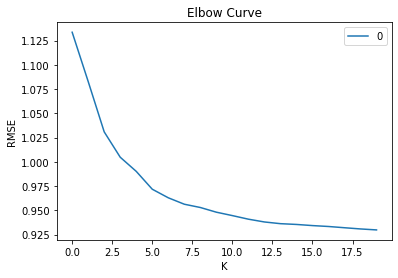

In [39]:
elbow_curve = pd.DataFrame(rmse_val)
elbow_curve.plot()
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Elbow Curve')

# Hyperparameter tuning with GridSearchCV

In [46]:
grid_params = {'n_neighbors' : [2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model_best = GridSearchCV(knn, grid_params, cv=5)
model_best.fit(X_train, y_train)
y_pred_knn_best = model_best.predict(X_test)
print(model_best.best_estimator_)

KNeighborsRegressor(n_neighbors=9)


In [47]:
cv_knn_best = cross_val_score(model_best, X_train, y_train, cv=5)
print(cv_knn_best)

[-0.05817228 -0.09694916 -0.02414444 -0.1733705  -0.07015246]


In [48]:
np.mean(cv_knn_best), np.std(cv_knn_best)

(-0.08455776818157834, 0.05018909123136702)

In [49]:
r2_score(y_test, y_pred_knn_best)

-0.0671975895203889

In [50]:
mean_absolute_error(y_test, y_pred_knn_best)

0.39230040501039454

# Negative MAE Comparison  

In [110]:
lr_neg_mae = cross_val_score(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [112]:
lr_mae_mean = np.mean(-1 * lr_neg_mae)
lr_mae_std = np.std(-1 * lr_neg_mae)
lr_mae_mean, lr_mae_std

(0.37158586734444193, 0.008617294000506703)

In [113]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

0.3698981018126119

In [115]:
rf_neg_mae = cross_val_score(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [117]:
rf_mae_mean = np.mean(-1 * rf_neg_mae)
rf_mae_std = np.std(-1 * rf_neg_mae)
rf_mae_mean, rf_mae_std

(0.30983578016086244, 0.006057037247197408)

In [118]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.30410257379752836

In [119]:
knn_neg_mae = cross_val_score(model_best.best_estimator_, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

In [120]:
knn_neg_mae_mean = np.mean(-1 * knn_neg_mae)
knn_neg_mae_std = np.std(-1 * knn_neg_mae)
knn_neg_mae_mean, knn_neg_mae_std

(0.3983651208024316, 0.008830209791589395)

In [121]:
mean_absolute_error(y_test,model_best.best_estimator_.predict(X_test))

0.39230040501039454

# Conclusion

After cross-validating and hyperparameter tuning with grid search CV on all three models, it appears that the best performing model in terms of mean absolute error is the Random Forest Regression model, as  it had the lowest MAE out of all models (0.30410257379752836),  and lowest variability (0.006057037247197408) after hyperparameter tuning. The Linear Regression model is the second best performing model, because it had a slightly higher MAE (0.3698981018126119) (but still lower than the KNN regression model) as well as variability (0.008617294000506703). The KNN Regression model was the worst performing with the highest MAE (0.39230040501039454) and highest variability (0.008830209791589395).

Therefore, I will proceed with using the Random Forest Regression model.

In [130]:
import joblib

In [133]:
model = rf_best
filename = 'RF Regression Model for Price Prediction.sav'
joblib.dump(model, filename)

['RF Regression Model for Price Prediction.sav']